<a href="https://colab.research.google.com/github/lalit-kumr/Cyber-Security-Case-Study/blob/main/Cyber%20Security%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NETWORK INTRUSION DETECTION

### Your task to build network intrusion detection system to detect anamolies and attacks in the network

In [1]:
# importing importing modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Importing data

In [31]:
smurf = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_Smurf.csv')
satan = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_Satan.csv')
root_kit = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_RootKit.csv')
port_sweep = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_PortSweep.csv')
normal = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_Normal.csv')
neptune = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_Neptune.csv')
nmap = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_NMap.csv')
guess_pass = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_GuessPassword.csv')
ftp_write = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_FTPWrite.csv ')
buffer_overflow = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back_BufferOverflow.csv')
back = pd.read_csv('https://github.com/lalit-kumr/Cyber-Security-Case-Study/raw/main/Data_of_Attack_Back.csv')
back.head()


,attack,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,back,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.001,0.002,0.0,0.0,0.0,0.050,0.1,0.0,0.100,0.001,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0
1,back,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.002,0.003,0.0,0.0,0.0,0.033,0.1,0.0,0.067,0.002,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0
2,back,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.003,0.004,0.0,0.0,0.0,0.025,0.1,0.0,0.050,0.003,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0
3,back,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.004,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0
4,back,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.005,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0


### Joining df's

In [55]:
list_of_df = [smurf,
              satan,
              root_kit,
              port_sweep,
              normal,
              neptune,
              nmap,
              guess_pass,
              ftp_write ,
              buffer_overflow,
              back]


df = pd.concat(list_of_df, ignore_index=True, sort=False)

### Creating a new column called activity
- if df.attack is normal, then '*normal*'
- if df.attack is anykind of attack, then '*attack*' 

In [56]:
df['activity'] = np.where(df['attack']=='normal','normal','attack')

In [57]:
df.select_dtypes(include=['O'])

,attack,activity
0,smurf,attack
1,smurf,attack
2,smurf,attack
3,smurf,attack
4,smurf,attack
...,...,...
817546,back,attack
817547,back,attack
817548,back,attack
817549,back,attack


### NA values

In [58]:
df.isna().sum()

#no na values

attack                          0
duration                        0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate

### Label encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df_cat = df.select_dtypes(include='O')
df_cat = df_cat.apply(encoder.fit_transform)
df_cat




,attack,activity
0,10,0
1,10,0
2,10,0
3,10,0
4,10,0
...,...,...
817546,0,0
817547,0,0
817548,0,0
817549,0,0


In [61]:
#for binomial classification we will drop the attack variable

target = df_cat.drop(labels='attack',axis=1)
target

,activity
0,0
1,0
2,0
3,0
4,0
...,...
817546,0
817547,0
817548,0
817549,0


In [62]:
#dropping attack and activity from df
df.drop(labels=['activity','attack'],axis=1,inplace=True)

### Outlier removal

In [63]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,8.175510e+05,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,8.175510e+05,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
mean,0.000877,0.000570,0.052909,0.020160,0.004961,0.024862,0.0,3.669496e-07,0.000003,0.002456,0.000016,0.063812,0.000275,0.000031,0.000011,0.001463,0.000284,0.000020,0.000360,0.0,1.223165e-07,0.000277,0.059857,0.014078,0.024833,0.024929,0.005355,0.005313,0.073471,0.002939,0.010064,0.166868,0.161651,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.002596,0.096389,0.030959,0.033235,0.066635,0.0,3.317904e-04,0.000805,0.041470,0.001618,0.048054,0.010338,0.001752,0.001412,0.031777,0.011742,0.001412,0.006566,0.0,1.105968e-04,0.005256,0.091984,0.031403,0.043074,0.043153,0.022330,0.022215,0.041806,0.010127,0.023558,0.102058,0.111642,0.043421,0.008557,0.017460,0.003708,0.043062,0.043151,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.003000,0.003000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.011000,0.008000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019690,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.106000,0.016000,0.015000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
max,1.000000,0.020000,0.670000,0.100000,1.000000,1.000000,0.0,3.000000e-01,0.500000,1.000000,0.500000,0.100000,1.000000,0.100000,0.200000,1.000000,1.000000,0.200000,0.900000,0.0,1.000000e-01,0.100000,0.511000,0.511000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [64]:
from scipy.stats.mstats import winsorize
# To winsorize data means to set extreme outliers equal to a specified percentile of the data.
# For example, a 90% winsorization sets all observations greater than the 95th percentile equal to the
# value at the 95th percentile and all observations less than the 5th percentile equal to the value at the 5th percentile.
#here the limits=[0.05 ,0.05] are the lower and upper percentile limits respectively


for x in df:
  df.loc[:,x] = winsorize(df[x], limits=[0.05, 0.05])
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817551.0,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,817551.0,817551.0,817551.0,817551.0,817551.000000,817551.0,817551.0,817551.0,817551.0,817551.0,817551.0,817551.0,817551.0,817551.0,817551.0,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
mean,0.0,0.000501,0.040969,0.020121,0.002371,0.018541,0.0,0.0,0.0,0.0,0.0,0.063812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057863,0.011045,0.024833,0.024929,0.005058,0.005313,0.073511,0.001809,0.008703,0.167028,0.161711,0.066815,0.002555,0.004203,0.001357,0.024865,0.024852,0.004226,0.004651
std,0.0,0.002182,0.056733,0.030887,0.002813,0.031586,0.0,0.0,0.0,0.0,0.0,0.048054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085761,0.009615,0.043074,0.043153,0.021071,0.022215,0.041736,0.002842,0.018662,0.101803,0.111556,0.043390,0.003306,0.009084,0.001898,0.043062,0.043151,0.017039,0.019391
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.006000,0.003000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003000,0.003000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.054000,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011000,0.008000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.120000,0.070000,0.002990,0.019690,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106000,0.016000,0.015000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
max,0.0,0.010000,0.140000,0.070000,0.011540,0.117620,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263000,0.036000,0.100000,0.100000,0.094000,0.100000,0.100000,0.007000,0.071000,0.255000,0.255000,0.100000,0.009000,0.035000,0.006000,0.100000,0.100000,0.076000,0.087000


### Profile report

In [65]:
## Here I am commenting out the profiling code because if you run the code in google colab, it throws an error.

# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("your_report.html")

### Feature selection

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#fit the data to the random forest classifier
rfc.fit(df,target.activity)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

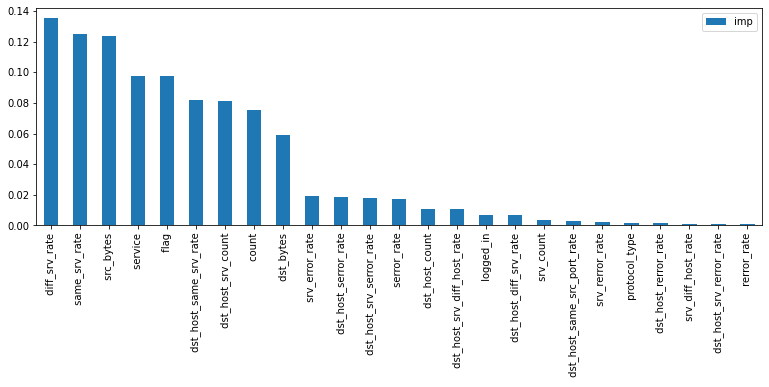

In [80]:
#store the featue importance in dataframe feature_impora
feature_imp = pd.DataFrame(index=df.columns,data=rfc.feature_importances_)
# renaming column names
feature_imp.columns=['imp']
# sorting the featues by descending importance
feature_imp = feature_imp.sort_values(by='imp',ascending=False)
#plotting features having importance > 0
feature_imp[feature_imp.imp > 0].plot(figsize=(13,4),kind='bar')

### RFE

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

dt_reg = DecisionTreeRegressor(random_state=0)

# rfc = RandomForestClassifier()


rfe = RFE(estimator=dt_reg, n_features_to_select=10)
rfe.fit(df, target.activity)

rfe.ranking_


# # selecting features given by RFE
# f = rfe.get_support(1) #the most important features
# selected_x = train_x[train_x.columns[f]] # final features`
# selected_x.columns

array([32,  6,  1,  1,  1,  1, 23, 22, 21, 24, 26,  7, 20, 28, 19, 18, 17,
       16, 27, 29, 31, 30,  1, 12, 15, 10,  2, 25,  1, 11, 14,  1,  1,  1,
        8,  1,  9, 13,  4,  3,  5])

### Splitting df and df_cat in train and test

In [50]:
# from sklearn.model_selection import train_test_split


# x_train, x_test, y_train, y_test = train_test_split(selected_x, train_y, test_size=0.25, random_state=72)